# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [139]:
# imports
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [140]:
# Initialize the Panel Extensions (for Plotly)
pn.extension("plotly")

In [141]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [142]:
# Import the census CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [143]:
# Import the coordinates CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path,index_col="neighbourhood")
df_neighbourhood_locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


In [144]:
to_data_neighbourhood_mean = to_data.groupby(['neighbourhood']).mean()
to_data_neighbourhood_mean

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00


In [145]:
df_join = pd.concat([df_neighbourhood_locations,to_data_neighbourhood_mean['average_house_value']],axis=1)
df_join

,lat,lon,average_house_value
neighbourhood,,,
Agincourt North,43.805441,-79.266712,329811.50
Agincourt South-Malvern West,43.788658,-79.265612,334189.00
Alderwood,43.604937,-79.541611,427922.50
Annex,43.671585,-79.404001,746977.00
Banbury-Don Mills,43.737657,-79.349718,612039.00
...,...,...,...
Wychwood,43.676919,-79.425515,565976.50
Yonge-Eglinton,43.704689,-79.403590,809745.75
Yonge-St.Clair,43.687859,-79.397871,813220.25


In [146]:
to_data_dwelling_coldrop = to_data_dwelling.drop(columns =['average_house_value','shelter_costs_owned','shelter_costs_rented'])
to_data_dwelling_coldrop.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [147]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
to_data_dwelling_types = to_data.groupby(['neighbourhood']).mean()
to_data_dwelling_types_top10 = to_data_dwelling_types.nlargest(10,'average_house_value',keep='first')
to_data_dwelling_types_top10

to_data_dwelling_types_top10.hvplot(kind = 'bar',
                                    x='neighbourhood',
                                    y='average_house_value',
                                    xlabel='Neighbourhood',
                                    value_label='Avg House Value',
                                    height=500,
                             rot=90)

:Bars   [neighbourhood]   (average_house_value)

In [148]:
# Calculate the mean number of dwelling types units per year
# YOUR CODE HERE!
to_data_dwelling_types = to_data.groupby(['year','neighbourhood']).sum()
to_data_dwelling_types.head()


single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                                3715   
     Agincourt South-Malvern West                   3250   
     Alderwood                                      3175   
     Annex                                          1060   
     Banbury-Don Mills                              3615   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                      1480   
     Agincourt South-Malvern West                         1835   
     Alderwood                                             315   
     Annex                                                6090   
     Banbury-Don Mills                                    4465   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                              0                 1055   
     Agincourt South-Malvern West                 0                  545   
     Alderwood                                    0                  470   
     Annex                                        5                 1980   
     Banbury-Don Mills                            0                  240   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                    1295     195   
     Agincourt South-Malvern West        455     105   
     Alderwood                            50     185   
     Annex                               605     275   
     Banbury-Don Mills                   380      15   

                                   apartment_five_storeys_less  other_house  \
year neighbourhood                                                            
2001 Agincourt North                                       185            5   
     Agincourt South-Malvern West                          425            0   
     Alderwood                                             370            0   
     Annex                                                3710          165   
     Banbury-Don Mills                                    1360            0   

                                   average_house_value  shelter_costs_owned  \
year neighbourhood                                                            
2001 Agincourt North                            200388                  810   
     Agincourt South-Malvern West               203047                  806   
     Alderwood                                  259998                  817   
     Annex                                      453850                 1027   
     Banbury-Don Mills                          371864                 1007   

                                   shelter_costs_rented  
year neighbourhood                                       
2001 Agincourt North                                870  
     Agincourt South-Malvern West                   892  
     Alderwood                                      924  
     Annex                                         1378  
     Banbury-Don Mills                             1163

In [149]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
to_data_dwelling = to_data.groupby(level='year').sum()
to_data_dwelling.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


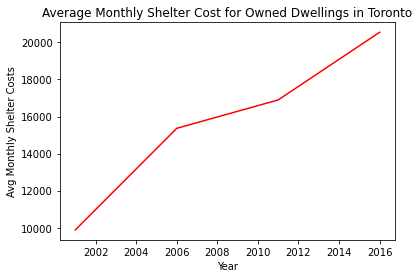

In [150]:
to_data_dwelling['shelter_costs_owned'] = to_data_dwelling['shelter_costs_owned']//12
#to_data_dwelling
create_line_chart(to_data_dwelling.loc[to_data_dwelling.index,'shelter_costs_owned'],
                  "Average Monthly Shelter Cost for Owned Dwellings in Toronto",
                  "Year",
                  "Avg Monthly Shelter Costs",
                  'red')

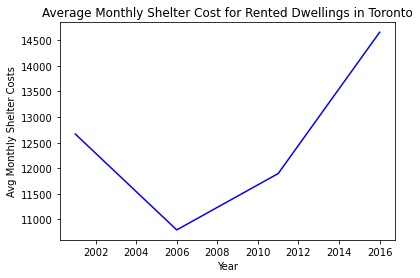

In [151]:
to_data_dwelling['shelter_costs_rented'] = to_data_dwelling['shelter_costs_rented']//12
#to_data_dwelling
create_line_chart(to_data_dwelling.loc[to_data_dwelling.index,'shelter_costs_rented'],
                  "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
                  "Year",
                  "Avg Monthly Shelter Costs",
                  'blue')

### Panel Visualization Functions

In [162]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
   
    # YOUR CODE HERE!
    fig_map = px.scatter_mapbox(df_join,
                        lat="lat", 
                        lon="lon",     
                        color="average_house_value", 
                        size="average_house_value",
                        title="Average House Values in Toronto",
                        zoom=10)
    return fig_map

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    # YOUR CODE HERE!
    return data.plot.bar(color = color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return bar_chart

def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    # YOUR CODE HERE!
    data.plot(color = color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def average_house_value():
    """Average house values per year."""
    
    # YOUR CODE HERE!

def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    # YOUR CODE HERE!

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    # YOUR CODE HERE!

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # YOUR CODE HERE!

def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    # YOUR CODE HERE!
    to_data_dwelling_types_top10.hvplot(kind = 'bar',
                                    x='neighbourhood',
                                    y='average_house_value',
                                    xlabel='Neighbourhood',
                                    value_label='Avg House Value',
                                    height=500,
                             rot=90)

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [163]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
pn.pane.Markdown('''#Toronto Real Estate - Investment Dashboard''')

Markdown(str)

In [164]:
# Define a welcome text
# YOUR CODE HERE!
pn.panel('<marquee><br><h2>Welcome to the Toronto Real Estate Investment Dashboard. </h2></br></marquee>')

Markdown(str)

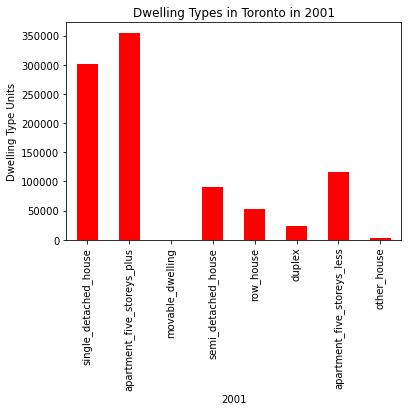

In [165]:
bar_2001 = pn.Column(
    ("2001", create_bar_chart(to_data_dwelling_coldrop.loc[2001],"Dwelling Types in Toronto in 2001","2001","Dwelling Type Units",'red')))

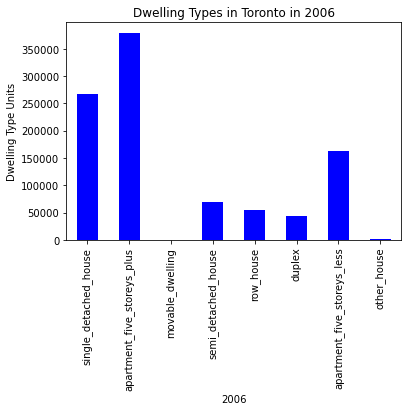

In [173]:
bar_2006 = pn.Column(
("2006", create_bar_chart(to_data_dwelling_coldrop.loc[2006],"Dwelling Types in Toronto in 2006","2006","Dwelling Type Units",'blue'))
)

In [178]:
bar_tab = pn.Tabs(("2001",bar_2001),("2006",bar_2006))
bar_tab

Tabs
    [0] Column
        [0] Str(tuple)
    [1] Column
        [0] Str(tuple)

In [171]:
# Create a tab layout for the dashboard
# YOUR CODE HERE!
dwelling_types = pn.Row("##Dwelling Types Per Year",
                       create_bar_chart(to_data_dwelling_coldrop.loc[ind],"Dwelling Types in Toronto in 2001","2001","Dwelling Type Units",'red'),)

NameError: name 'ind' is not defined

In [ ]:
# Create the main dashboard
# YOUR CODE HERE!

## Serve the Panel Dashboard

In [ ]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# neighbourhood_map().show()

In [ ]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [ ]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [ ]:
# average_house_value()

In [ ]:
# average_value_by_neighbourhood()

In [ ]:
# number_dwelling_types()

In [ ]:
# average_house_value_snapshot()

In [ ]:
# top_most_expensive_neighbourhoods()

In [ ]:
# sunburts_cost_analysis()